### Canonical Polyadic e Reconstrução
#### Esta é uma implementação que aplica a CP Decomposition em uma imagem, gerando CPtensor rank-3, rank-10 e rank-20 e compara suas reconstruções com a imagem original.

In [6]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from keras import utils

In [2]:
# Imagem para tensor Keras
img = utils.load_img("rock_lee.jpg", target_size=(150,150))
img_tensor = utils.img_to_array(img)
img_tensor /= 255.

print(img_tensor.shape)

(150, 150, 3)


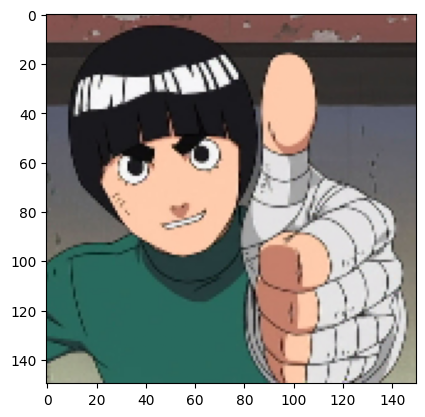

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor)
plt.show()

In [4]:
#convertendo tensor do Keras para tensor do TensorLy
img_tl = tl.tensor(img_tensor)

In [17]:
# Aplicando a decomposição de tucker e gerando o core e os factors
factors_3 = parafac(img_tl, rank = 3)
factors_10 = parafac(img_tl, rank = 10)
factors_20 = parafac(img_tl, rank = 20)

In [23]:
print("Shape do tensor original:")
print(tl.shape(img_tl))

print("Shape das matrizes CP rank-3:")
print(factors_3.factors[0].shape)
print(factors_3.factors[1].shape)
print(factors_3.factors[2].shape)

print("Shape das matrizes CP rank-10:")
print(factors_10.factors[0].shape)
print(factors_10.factors[1].shape)
print(factors_10.factors[2].shape)

print("Shape das matrizes CP rank-20:")
print(factors_20.factors[0].shape)
print(factors_20.factors[1].shape)
print(factors_20.factors[2].shape)

print("Tensor original =", np.prod(tl.shape(img_tl)), "entradas")
print("Canonical Polyadic rank-3 = ", np.prod(factors_3.factors[0].shape) + np.prod(factors_3.factors[1].shape) + np.prod(factors_3.factors[2].shape), "entradas")
print("Canonical Polyadic rank-10 = ", np.prod(factors_10.factors[0].shape) + np.prod(factors_10.factors[1].shape) + np.prod(factors_10.factors[2].shape), "entradas")
print("Canonical Polyadic rank-20 = ", np.prod(factors_20.factors[0].shape) + np.prod(factors_20.factors[1].shape) + np.prod(factors_20.factors[2].shape), "entradas")

Shape do tensor original:
(150, 150, 3)
Shape das matrizes CP rank-3:
(150, 3)
(150, 3)
(3, 3)
Shape das matrizes CP rank-10:
(150, 10)
(150, 10)
(3, 10)
Shape das matrizes CP rank-20:
(150, 20)
(150, 20)
(3, 20)
Tensor original = 67500 entradas
Canonical Polyadic rank-3 =  909 entradas
Canonical Polyadic rank-10 =  3030 entradas
Canonical Polyadic rank-20 =  6060 entradas


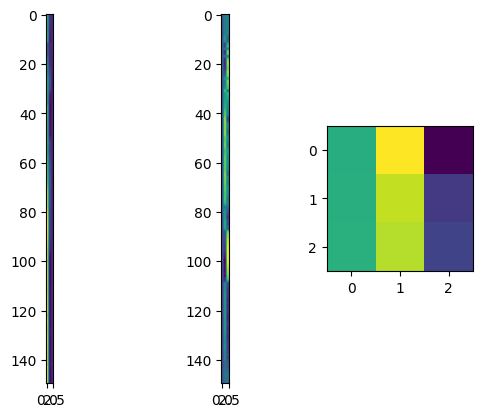

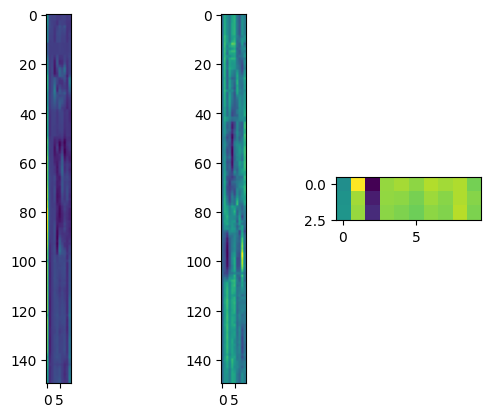

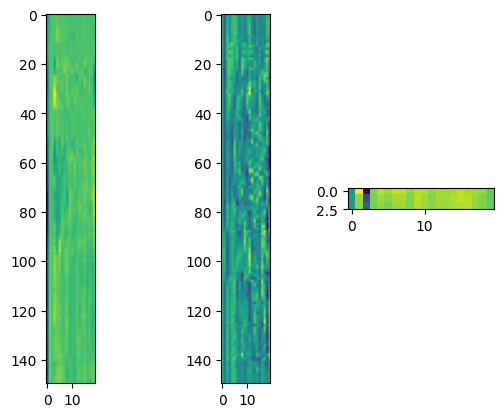

In [24]:
figure = plt.figure()

# Plotando as matrizes da Tucker core-3
figure.add_subplot(1, 3, 1)
plt.imshow(factors_3.factors[0].squeeze())
figure.add_subplot(1, 3, 2)
plt.imshow(factors_3.factors[1].squeeze())
figure.add_subplot(1, 3, 3)
plt.imshow(factors_3.factors[2].squeeze())
plt.show()

figure = plt.figure()

# Plotando as matrizes da Tucker core-10
figure.add_subplot(1, 3, 1)
plt.imshow(factors_10.factors[0].squeeze())
figure.add_subplot(1, 3, 2)
plt.imshow(factors_10.factors[1].squeeze())
figure.add_subplot(1, 3, 3)
plt.imshow(factors_10.factors[2].squeeze())
plt.show()

figure = plt.figure()

# Plotando as matrizes da Tucker core-10
figure.add_subplot(1, 3, 1)
plt.imshow(factors_20.factors[0].squeeze())
figure.add_subplot(1, 3, 2)
plt.imshow(factors_20.factors[1].squeeze())
figure.add_subplot(1, 3, 3)
plt.imshow(factors_20.factors[2].squeeze())
plt.show()

In [25]:
# Reconstruindo o tensor original a partir dos fatores
reconstruct_3 = tl.cp_to_tensor(factors_3)
reconstruct_10 = tl.cp_to_tensor(factors_10)
reconstruct_20 = tl.cp_to_tensor(factors_20)

In [26]:
print(reconstruct_3.shape)
print(reconstruct_10.shape)
print(reconstruct_20.shape)

(150, 150, 3)
(150, 150, 3)
(150, 150, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


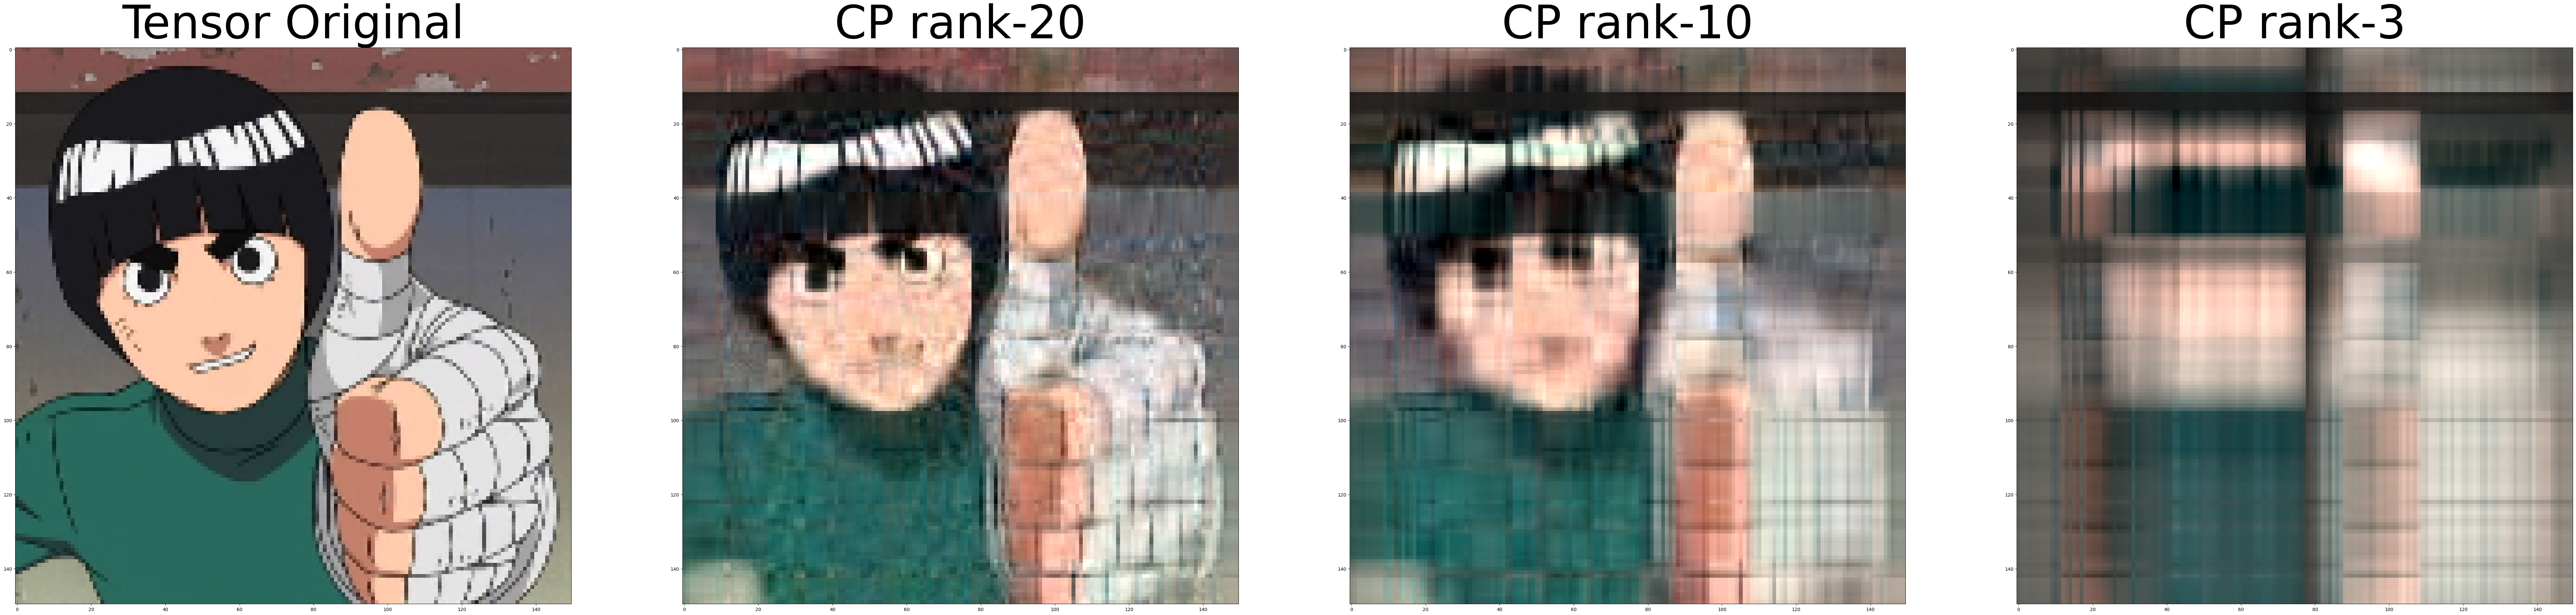

In [28]:
figure = plt.figure(figsize = (100, 100))

figure.add_subplot(1,4,1)
plt.imshow(img_tensor.squeeze())
plt.title("Tensor Original", size = 100)

figure.add_subplot(1,4,2)
plt.imshow(reconstruct_20.squeeze())
plt.title("CP rank-20", size = 100)

figure.add_subplot(1,4,3)
plt.imshow(reconstruct_10.squeeze())
plt.title("CP rank-10", size = 100)

figure.add_subplot(1,4,4)
plt.imshow(reconstruct_3.squeeze())
plt.title("CP rank-3", size = 100)

plt.show()